# BMO - Stock Prices Prediction

## 1. Import Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_datareader as webreader
import pandas as pd
import tensorflow as tf
import seaborn as sns
import datetime as dt
import pandas_datareader as webreader
from datetime import date, timedelta, datetime

## 2. Load Data

In [6]:
# Import dataset
df = pd.read_csv('BMO_StockPrices_2010-2021.csv')

# today = date.today()
# date_today = today.strftime("%Y-%m-%d")
# date_start = '2016-01-01'

# # Read stock quotes from Yahoo Finance
# df = webreader.DataReader('CM-PQ', data_source='yahoo', start=date_start, end=date_today)

# Input data of np array - Closing price
dataset = df.iloc[:, 4:5].values

print(dataset.shape)

(1254, 1)


In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-13,85.010002,85.160004,84.529999,84.900002,69.197426,1330000
1,2016-09-14,84.800003,85.410004,84.650002,84.959999,69.246338,668700
2,2016-09-15,85.070000,85.930000,85.029999,85.629997,69.792412,2290900
3,2016-09-16,85.639999,85.639999,84.860001,85.209999,69.450081,2180200
4,2016-09-19,85.610001,86.050003,85.180000,85.389999,69.596786,625700
...,...,...,...,...,...,...,...
1249,2021-09-03,127.849998,127.959999,127.040001,127.730003,127.730003,1100600
1250,2021-09-07,128.369995,129.369995,128.179993,128.500000,128.500000,1121800
1251,2021-09-08,128.240005,129.139999,127.699997,128.440002,128.440002,807100
1252,2021-09-09,128.059998,128.720001,127.930000,128.270004,128.270004,1330800


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1254 non-null   object 
 1   Open       1254 non-null   float64
 2   High       1254 non-null   float64
 3   Low        1254 non-null   float64
 4   Close      1254 non-null   float64
 5   Adj Close  1254 non-null   float64
 6   Volume     1254 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.7+ KB


In [9]:
# Check for missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# imputer.fit_transform(dataset)
# dataset = imputer.transform(dataset)
# df.dropna(inplace=True)

## 3. Visualize Data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ef92ea2d0>,
      dtype=object)

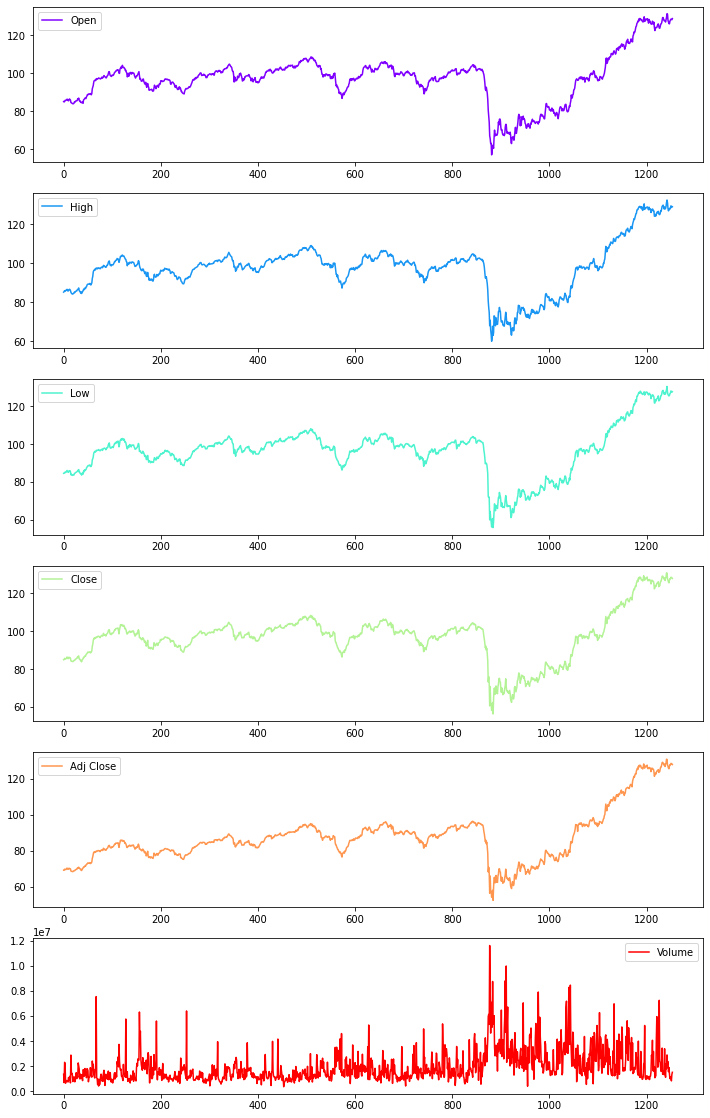

In [11]:
# Plot each data column
df.plot(subplots=True, figsize=(12,20), sharex=False, cmap='rainbow')

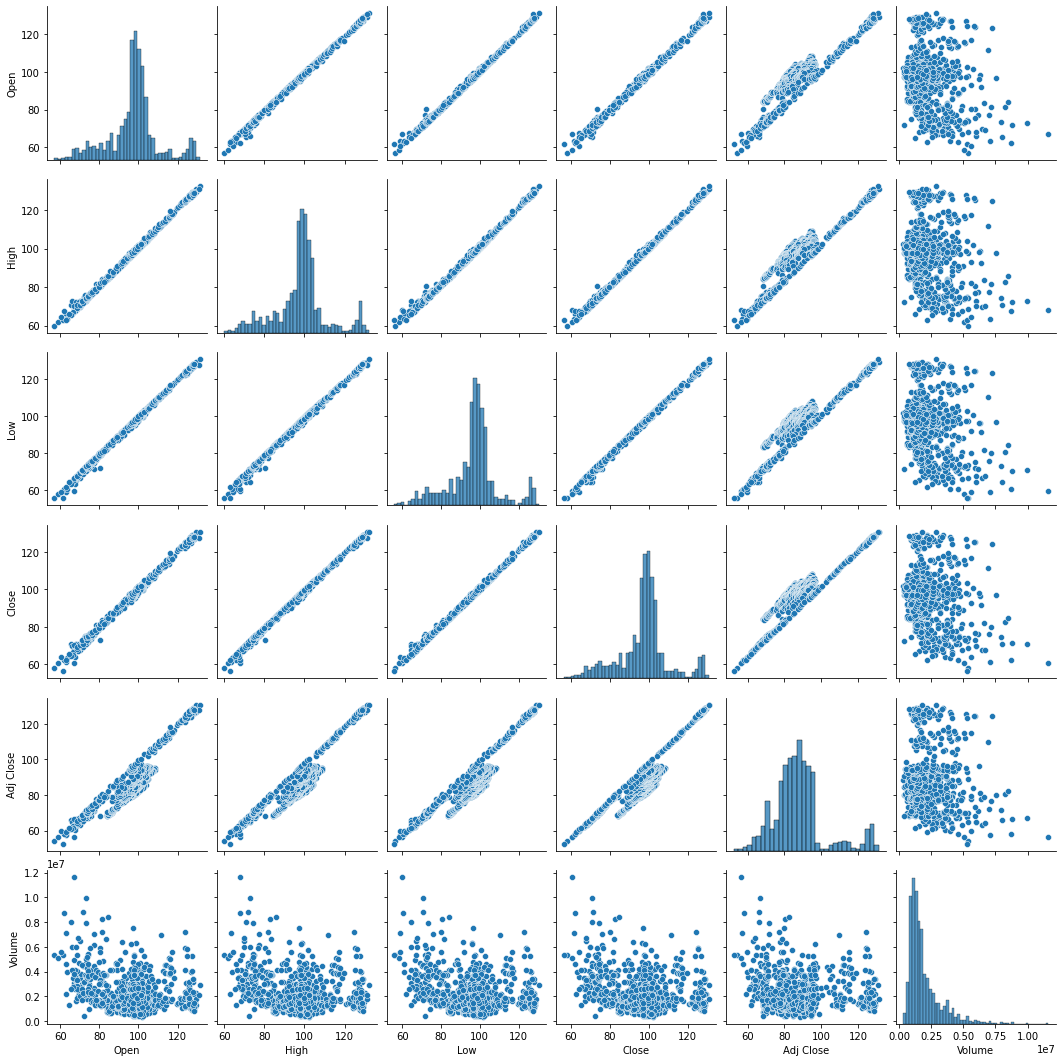

In [12]:
# Pariwise relationship between features
sns.pairplot(df)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

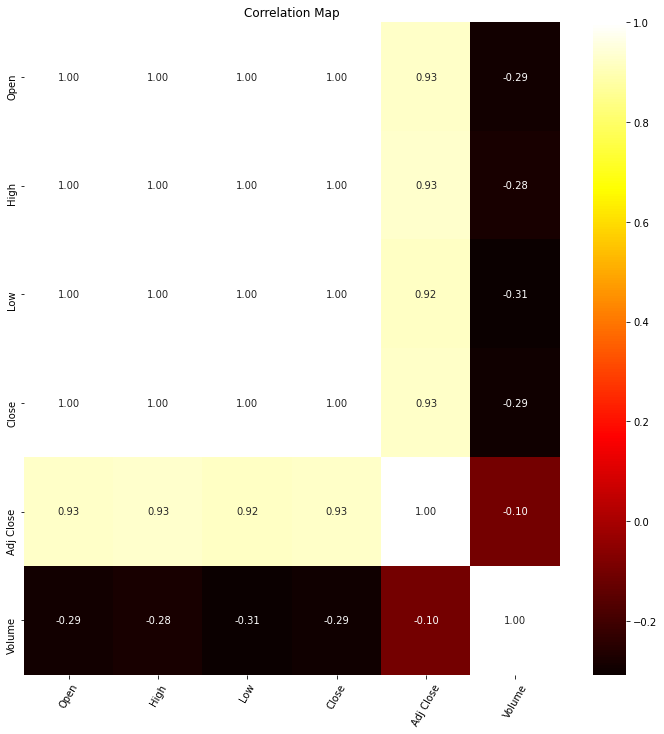

In [13]:
# Correlation Map
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='hot', fmt='.2f')
plt.title('Correlation Map')
plt.xticks(rotation=60)

## 4. Data Preprocessing and Feature Engineering

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Normalize data
sc = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = sc.fit_transform(dataset)

In [16]:
dataset_scaled

array([[0.38402791],
       [0.38483183],
       [0.39380943],
       ...,
       [0.96743946],
       [0.96516158],
       [0.95966777]])

In [17]:
# Split dataset into training set and test set (80/20 split)
training_size = int(len(df)*0.8)
dataset_train = dataset_scaled[:training_size]
dataset_test = dataset_scaled[training_size:]

print('Training set shape: ' + str(dataset_train.shape))
print('Test set shape: ' + str(dataset_test.shape))

Training set shape: (1003, 1)
Test set shape: (251, 1)


#### Create a data structure with 60 timesteps and 1 output

In [18]:
# Predict stock price results using 60 timesteps (60 business days)
timesteps = 60

def define_training_data(timesteps, dataset):
  ''' 
  Define number of timesteps and features needed for training and 
  validating RNN model 
  '''

  # X - number of timesteps, y - indicators (features) used for training
  X, y = [], []
  for i in range(timesteps, dataset.shape[0]):
    X.append(dataset[i-timesteps:i, 0])
    y.append(dataset[i, 0])
  X, y = np.array(X), np.array(y)
  return X, y

X_train, y_train = define_training_data(timesteps, dataset_train)
print(X_train.shape, y_train.shape)

(943, 60) (943,)


#### Reshaping

In [19]:
# Reshape(number of rows, number of timesteps (columns), number of predictors)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
X_train

array([[[0.38402791],
        [0.38483183],
        [0.39380943],
        ...,
        [0.43896558],
        [0.44673728],
        [0.47996783]],

       [[0.38483183],
        [0.39380943],
        [0.38818169],
        ...,
        [0.44673728],
        [0.47996783],
        [0.49443924]],

       [[0.39380943],
        [0.38818169],
        [0.39059359],
        ...,
        [0.47996783],
        [0.49443924],
        [0.51963016]],

       ...,

       [[0.21787484],
        [0.24400371],
        [0.24708562],
        ...,
        [0.34436557],
        [0.33739781],
        [0.3367279 ]],

       [[0.24400371],
        [0.24708562],
        [0.27509041],
        ...,
        [0.33739781],
        [0.3367279 ],
        [0.3205146 ]],

       [[0.24708562],
        [0.27509041],
        [0.26664879],
        ...,
        [0.3367279 ],
        [0.3205146 ],
        [0.32801824]]])

In [21]:
X_train.shape

(943, 60, 1)

## 5. Define LSTM model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Epoch 1/100
30/30 [==============================] - 11s 146ms/step - loss: 0.0354
Epoch 2/100
30/30 [==============================] - 4s 145ms/step - loss: 0.0069
Epoch 3/100
30/30 [==============================] - 4s 144ms/step - loss: 0.0055
Epoch 4/100
30/30 [==============================] - 4s 144ms/step - loss: 0.0046
Epoch 5/100
30/30 [==============================] - 4s 145ms/step - loss: 0.0042
Epoch 6/100
30/30 [==============================] - 4s 146ms/step - loss: 0.0042
Epoch 7/100
30/30 [==============================] - 4s 144ms/step - loss: 0.0037
Epoch 8/100
30/30 [==============================] - 4s 145ms/step - loss: 0.0038
Epoch 9/100
30/30 [==============================] - 4s 144ms/step - loss: 0.0034
Epoch 10/100
30/30 [==============================] - 4s 147ms/step - loss: 0.0033
Epoch 11/100
30/30 [==============================] - 4s 143ms/step - loss: 0.0033
Epoch 12/100
30/30 [==============================] - 4s 143ms/step - loss: 0.0029
Epoch 13/100

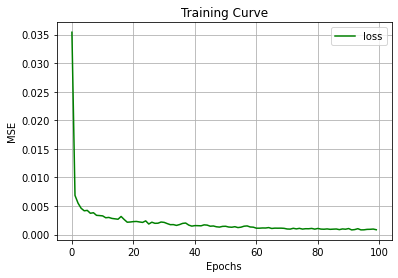

In [53]:
# Define model
reg = Sequential()

# LSTM layers
reg.add(LSTM(units=70, return_sequences=True, 
             input_shape=(X_train.shape[1], X_train.shape[2])))
reg.add(Dropout(0.2))
reg.add(LSTM(units=70, return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=60, return_sequences=True))
reg.add(Dropout(0.1))
reg.add(LSTM(units=60, return_sequences=False))
reg.add(Dropout(0.1))

# Output layer
reg.add(Dense(units=X_train.shape[2]))

# Compile model
# The Adam optimizer is always a safe choice for any DNN model
# Alternatively, use RMSprop
reg.compile(optimizer='adam', loss='mean_squared_error')

# Train (fit) model
history = reg.fit(X_train, y_train, batch_size=32, epochs=100)

# Plot loss during training
plt.plot(history.history['loss'], 'g', label='loss')
plt.title('Training Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

## 6. Evalutate model

#### Make predictions

In [54]:
# Get 60 previous stock prices for predicting
inputs = dataset[len(dataset)-len(dataset_test) - timesteps:]
# Reshape input values
inputs = inputs.reshape(-1, 1)
# Scale input values, directly apply transformations (already fitted)
inputs = sc.transform(inputs)

# Define test set structure
X_test = []
# For the entire test set
for i in range(timesteps, timesteps + len(dataset_test)):
  # Range of values from i-60 to i, first column
  X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)

# Obtain 3D structure of the test set
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Predict the test set results
predicted_stock_price = reg.predict(X_test)
# Apply inverse transformations
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
real_stock_price = sc.inverse_transform(dataset_test)

# Print predicted and real stock prices side-by-side
print(np.concatenate((predicted_stock_price.reshape(len(predicted_stock_price), 1), 
                      real_stock_price.reshape(len(real_stock_price), 1)), 1 ))

# Print Scores
print('')
print('--- Prediction Scores ---')
print('')
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: ' + str(mae))
mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: ' + str(mse))
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+ str(rmse))
r2 = r2_score(real_stock_price, predicted_stock_price)
print('R^2 Score: '+ str(r2))

[[ 80.51072693  80.510002  ]
 [ 80.4420929   81.360001  ]
 [ 80.78498077  81.25      ]
 [ 81.27050781  80.639999  ]
 [ 81.51251984  80.790001  ]
 [ 81.53730774  80.230003  ]
 [ 81.3290863   79.169998  ]
 [ 80.78621674  78.040001  ]
 [ 79.89398956  77.650002  ]
 [ 78.93125916  77.989998  ]
 [ 78.31789398  77.980003  ]
 [ 78.13387299  79.589996  ]
 [ 78.62376404  78.169998  ]
 [ 79.07581329  77.839996  ]
 [ 79.16944885  77.080002  ]
 [ 78.83570099  77.400002  ]
 [ 78.42168427  78.449997  ]
 [ 78.38732147  80.370003  ]
 [ 79.09422302  81.720001  ]
 [ 80.38645935  82.209999  ]
 [ 81.74542999  81.779999  ]
 [ 82.63772583  81.389999  ]
 [ 82.90026855  80.940002  ]
 [ 82.63742828  81.010002  ]
 [ 82.18167877  80.989998  ]
 [ 81.78276825  79.779999  ]
 [ 81.25714874  80.860001  ]
 [ 80.99233246  81.949997  ]
 [ 81.28684235  82.730003  ]
 [ 82.04182434  84.089996  ]
 [ 83.14352417  83.650002  ]
 [ 84.04387665  82.080002  ]
 [ 84.15766144  80.080002  ]
 [ 83.23530579  81.080002  ]
 [ 82.15961456

#### Visualizing results

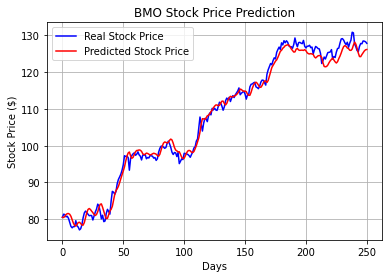

In [55]:
# Plot predicted and real closing stock prices
plt.plot(real_stock_price, color = 'blue', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Days')
plt.ylabel('Stock Price ($)')
plt.title('BMO Stock Price Prediction')
plt.legend()
plt.grid()
plt.show()